# Problem Statement

## Predicting wieght of Fish for Given features

### Importing pandas for Data Manipulation and seaborn ,matplotlib for visualization

In [406]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [407]:
# Description of Features

In [408]:
# Meaning of the columns :
# 1.Species : name of the fish
# 2.length1 : vertical length in cm
# 3.length2 : Diagnol length in cm
# 4.length3 : Cross length in cm
# 5.Height :  Height in cm    
# 6.weight :weight in grams

## Reading CSV File

In [409]:
df = pd.read_csv("C:/Users/user/Desktop/w/Fish.csv")

In [410]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [411]:
df.columns = [i.lower() for i in df.columns]

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
species    159 non-null object
weight     159 non-null float64
length1    159 non-null float64
length2    159 non-null float64
length3    159 non-null float64
height     159 non-null float64
width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Feature Engineering

## Checking For Null Values 

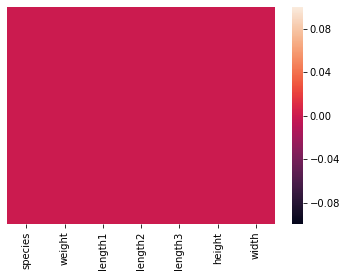

In [413]:
sns.heatmap(df.isnull(),yticklabels = False)

## Checking for outliers in dataset

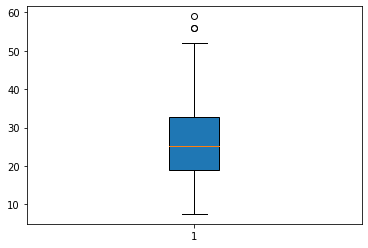

In [414]:
plt.boxplot(df.length1,patch_artist = True)
plt.show()

In [415]:
df[df["length1"] > 50].iloc[:,:] 

,species,weight,length1,length2,length3,height,width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


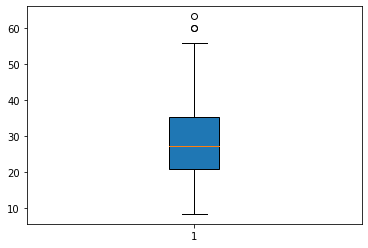

In [416]:
plt.boxplot(df.length2,patch_artist = True)
plt.show()

In [417]:
df[df["length2"] > 55].iloc[:,:] 

,species,weight,length1,length2,length3,height,width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


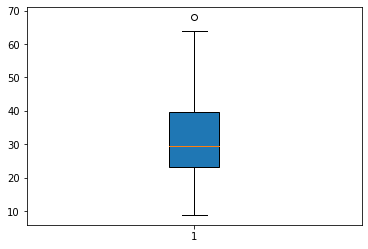

In [418]:
plt.boxplot(df.length3,patch_artist = True)
plt.show()

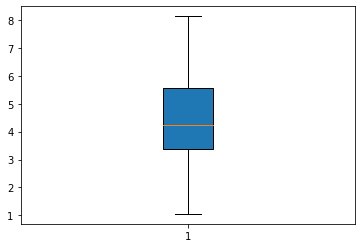

In [419]:
plt.boxplot(df.width,patch_artist = True)
plt.show()

In [420]:
df.sort_values(by = "weight",inplace = True)
df.reset_index(inplace = True,drop = True)
df = df[df["weight"]!=0].iloc[:,:]

In [421]:
df.species.value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: species, dtype: int64

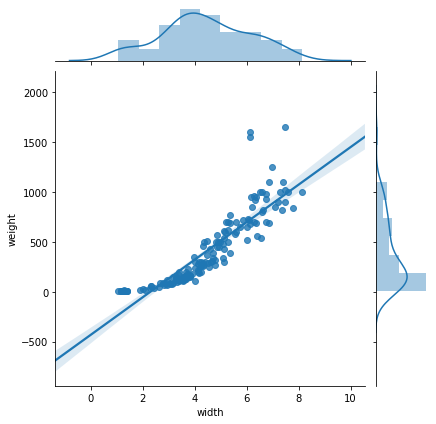

In [422]:
sns.jointplot("width","weight",data = df,kind = "reg")

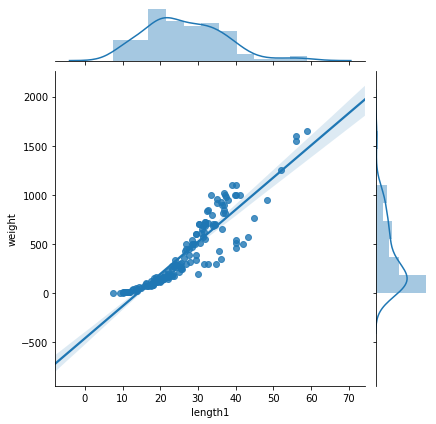

In [423]:
sns.jointplot("length1","weight",data = df,kind = "reg")

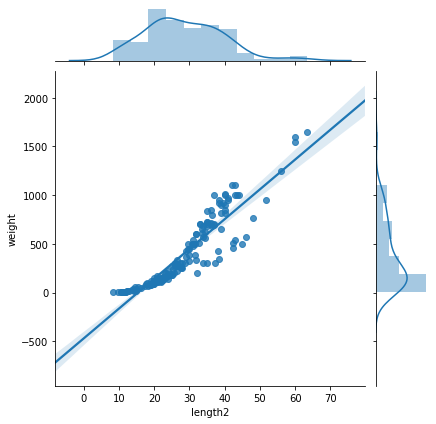

In [424]:
sns.jointplot("length2","weight",data = df,kind = "reg")

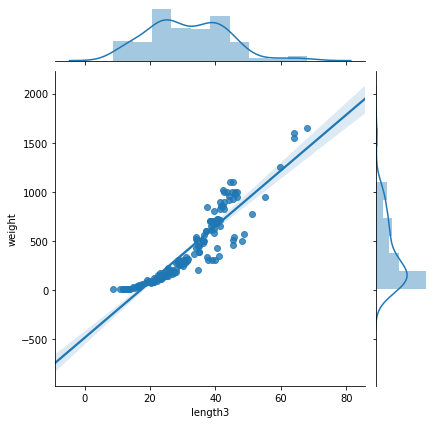

In [425]:
sns.jointplot("length3","weight",data = df,kind = "reg")

In [426]:
df[df["weight"]==40.0].iloc[:,:]

,species,weight,length1,length2,length3,height,width
17,Perch,40.0,13.8,15.0,16.0,3.8240,2.432
18,Roach,40.0,12.9,14.1,16.2,4.1472,2.268


In [427]:
df[df["weight"]==6.7].iloc[:,:]

,species,weight,length1,length2,length3,height,width
2,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


# Using Interquantile range for removing outliers

In [428]:
iqr = df.weight.quantile(0.75) - df.weight.quantile(0.25)
lb  = df.weight.quantile(0.25) - iqr*1.5
ub  = df.weight.quantile(0.75) + iqr*1.5
lb,ub

(-671.875, 1443.125)

In [429]:
a = df.weight

In [430]:
out=a[(a<lb)|(a>ub)]
out

156    1550.0
157    1600.0
158    1650.0
Name: weight, dtype: float64

In [431]:
df.tail()

,species,weight,length1,length2,length3,height,width
154,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
155,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
156,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
157,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
158,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [432]:
df = df.iloc[:156,:]

In [433]:
iqr = df.length1.quantile(0.75) - df.length1.quantile(0.25)
lb  = df.length1.quantile(0.25) - iqr*1.5
ub  = df.length1.quantile(0.75) + iqr*1.5
lb,ub

(-1.1374999999999886, 52.76249999999999)

In [434]:
iqr = df.length2.quantile(0.75) - df.length2.quantile(0.25)
lb  = df.length2.quantile(0.25) - iqr*1.5
ub  = df.length2.quantile(0.75) + iqr*1.5
lb,ub

(0.0, 56.0)

In [435]:
iqr = df.length3.quantile(0.75) - df.length3.quantile(0.25)
lb  = df.length3.quantile(0.25) - iqr*1.5
ub  = df.length3.quantile(0.75) + iqr*1.5
lb,ub

(-1.350000000000005, 64.05)

In [436]:
iqr = df.width.quantile(0.75) - df.width.quantile(0.25)
lb  = df.width.quantile(0.25) - iqr*1.5
ub  = df.width.quantile(0.75) + iqr*1.5
lb,ub

(0.11850000000000138, 8.844299999999999)

In [437]:
df[df["width"]>8].iloc[:,:]

,species,weight,length1,length2,length3,height,width
151,Perch,1000.0,40.2,43.5,46.0,12.604,8.142


In [438]:
df.groupby("species").mean()

,weight,length1,length2,length3,height,width
species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,597.866667,40.473333,43.320000,46.413333,7.381473,4.856300
Roach,160.052632,20.731579,22.368421,25.084211,6.706353,3.673968
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [439]:
df = pd.get_dummies(df,columns = ["species"],drop_first = True)

In [440]:
df.head()

,weight,length1,length2,length3,height,width,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish
1,5.9,7.5,8.4,8.8,2.1120,1.4080,0,1,0,0,0,0
2,6.7,9.3,9.8,10.8,1.7388,1.0476,0,0,0,0,1,0
3,7.0,10.1,10.6,11.6,1.7284,1.1484,0,0,0,0,1,0
4,7.5,10.0,10.5,11.6,1.9720,1.1600,0,0,0,0,1,0
5,8.7,10.8,11.3,12.6,1.9782,1.2852,0,0,0,0,1,0


# Model Building 
## Spliting Dataset into Train data and Test Data sets respectively

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [318]:
x = df.iloc[:,1:]
y = df.weight

## training Model with train dataset

In [391]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.4,random_state = 1)

In [392]:
model = LinearRegression()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)


## Evalution of model with test data set

In [441]:
res = pd.DataFrame(ytest)

In [442]:
res["pred"] = pred


In [443]:
res.reset_index(drop = True,inplace = True)

Text(0, 0.5, 'weight')

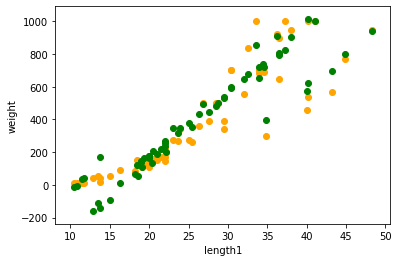

In [444]:
plt.scatter(xtest["length1"],ytest,color = "orange")
plt.scatter(xtest["length1"],pred,color = "green")
plt.xlabel("length1")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

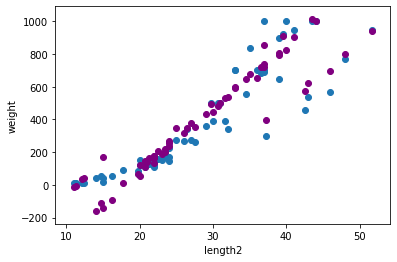

In [445]:
plt.scatter(xtest["length2"],ytest)
plt.scatter(xtest["length2"],pred,color = "purple")
plt.xlabel("length2")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

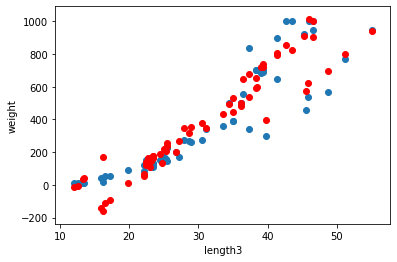

In [446]:
plt.scatter(xtest["length3"],ytest)
plt.scatter(xtest["length3"],pred,color = "red")
plt.xlabel("length3")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

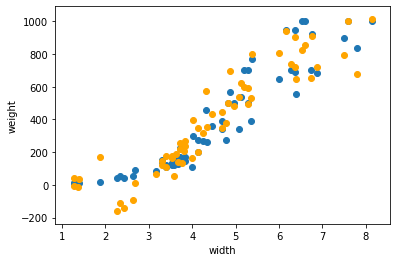

In [447]:
plt.scatter(xtest["width"],ytest)
plt.scatter(xtest["width"],pred,color = "orange")
plt.xlabel("width")
plt.ylabel("weight")

In [448]:
res.head(10)

,weight,pred
0,650.0,804.521894
1,270.0,319.385122
2,150.0,123.649153
3,110.0,107.508639
4,120.0,169.711003
5,125.0,140.264843
6,19.9,170.244098
7,540.0,620.613847
8,150.0,133.732470
9,1000.0,821.866046


In [449]:
print("model accuracy :",r2_score(pred,ytest))

model accuracy : 0.9206847602982331
